
## California Housing ML

Predictive ML model for California Housing dataset. Full workflow: data cleaning, EDA, feature engineering, pipelines, model selection (Random Forest, XGBoost), metrics comparison and visualizations. Project built in Jupyter Notebook as part of ML learning path.

W kolejnych ćwiczeniach:
- Wczytamy rzeczywisty zbiór danych (np. ceny nieruchomości).
- Przeprowadzimy EDA: obliczymy statystyki, sprawdzimy brakujące dane, wizualizacje.
- Dopasujemy model regresji liniowej, następnie Ridge i Lasso.
- Zbadamy, jak regularyzacja wpływa na współczynniki i jakość modelu.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.datasets import fetch_california_housing
# -------------------------------------
# Wczytanie i eksploracja danych
# -------------------------------------
data = fetch_california_housing()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

In [7]:
print(type(data))
print(data.keys())
# Rozmiar danych
print("Rozmiar zbioru:", df.shape)

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
Rozmiar zbioru: (20640, 9)


In [8]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
df.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
6763,3.1103,26.0,3.950777,1.068653,2153.0,2.788860,34.10,-118.13,2.141
17442,3.0081,5.0,4.699029,1.135922,1302.0,2.106796,34.66,-120.46,1.352
18911,3.7240,15.0,5.151276,1.068651,5008.0,3.042527,38.14,-122.24,1.316
14279,1.1563,38.0,4.843902,1.200000,760.0,3.707317,32.71,-117.13,0.827
11542,5.7157,26.0,6.292632,1.008421,1596.0,3.360000,33.75,-118.02,2.312
11880,3.1450,37.0,5.347826,1.034325,948.0,2.169336,33.98,-117.39,1.691
13230,6.4559,16.0,7.641161,1.065963,1165.0,3.073879,34.15,-117.64,3.929
1131,2.8182,22.0,5.302041,0.983673,1151.0,2.348980,39.76,-121.63,1.097
2851,3.5938,35.0,5.951743,1.040214,906.0,2.428954,35.38,-118.95,0.952
3234,2.2500,32.0,4.851613,1.025806,524.0,3.380645,36.11,-119.59,0.500


In [11]:
# Informacje o danych
print("\nInformacje o zbiorze danych:")
df.info()


Informacje o zbiorze danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
# Statystyki opisowe include='all'/'float64'/'object'
print("\nStatystyki opisowe:")
df.describe(include='all')


Statystyki opisowe:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [13]:
df.describe(include='float64')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
# Braki danych
print("\nBrakujące wartości:")
df.isnull().sum()


Brakujące wartości:


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

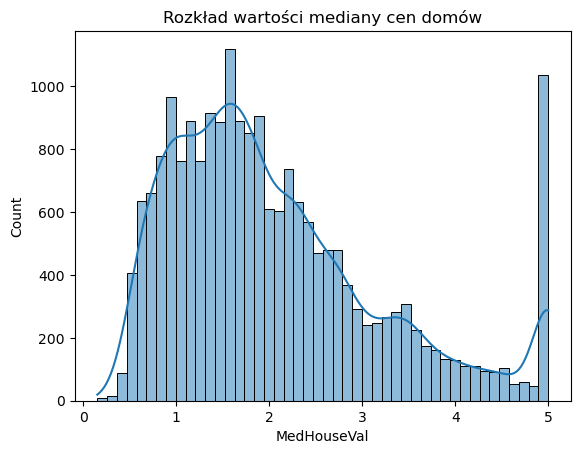

In [15]:
# Wizualizacja rozkładu zmiennej docelowej, czy jest cos niepokojacego?
sns.histplot(df['MedHouseVal'], kde=True)
plt.title("Rozkład wartości mediany cen domów")
plt.show()

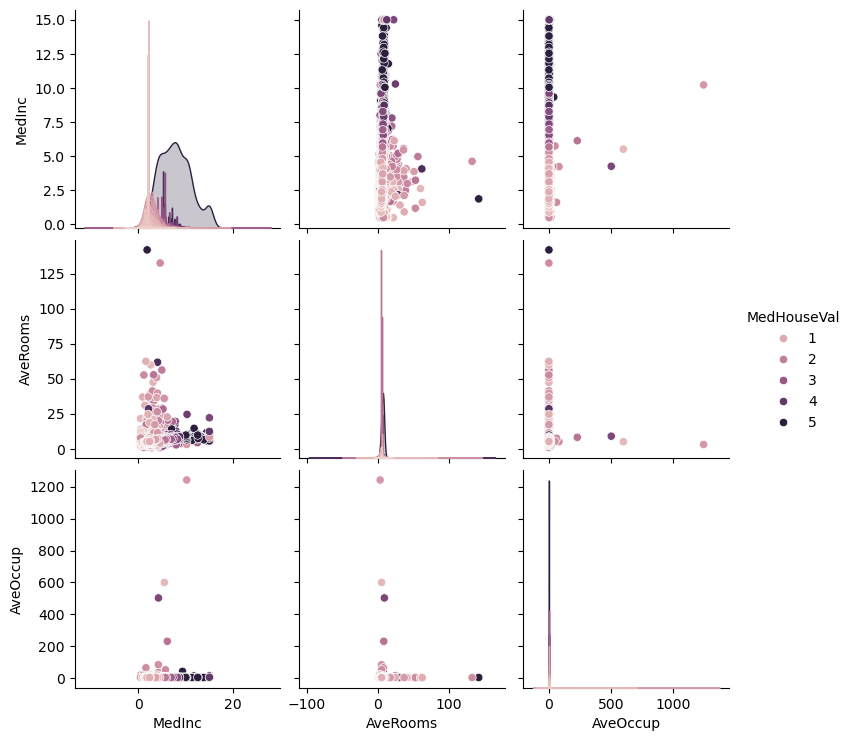

In [16]:
sns.pairplot(df[['MedHouseVal', 'MedInc', 'AveRooms', 'AveOccup']], hue='MedHouseVal')
plt.show()


In [17]:
house_val_counts = df['MedHouseVal'].value_counts()
house_val_counts

MedHouseVal
5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
0.34200      1
0.46200      1
3.52000      1
3.07900      1
3.85200      1
Name: count, Length: 3842, dtype: int64

In [18]:
max_value=df['MedHouseVal'].max()

df[df['MedHouseVal']==max_value].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,9.650000e+02
mean,7.825123,33.802073,6.817436,1.097833,1112.808290,2.570442,35.225751,-119.702477,5.000010e+00
std,3.245021,13.027787,4.666195,0.801147,813.321776,1.492767,1.783949,1.946521,8.886390e-16
min,0.499900,2.000000,1.824719,0.500000,13.000000,1.275000,32.680000,-122.640000,5.000010e+00
25%,5.239100,24.000000,5.505593,1.009554,636.000000,2.079710,33.970000,-122.120000,5.000010e+00
50%,7.719700,34.000000,6.884058,1.052227,927.000000,2.518789,34.130000,-118.480000,5.000010e+00
75%,10.112200,44.000000,7.893733,1.102450,1347.000000,2.840580,37.400000,-118.330000,5.000010e+00
max,15.000100,52.000000,141.909091,25.636364,7431.000000,41.214286,38.910000,-116.430000,5.000010e+00


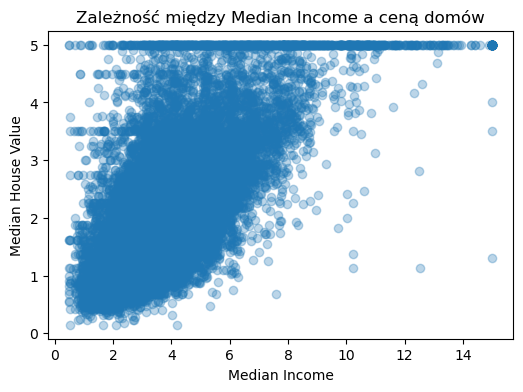

In [19]:
plt.figure(figsize=(6,4))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Zależność między Median Income a ceną domów")
plt.show()

In [20]:
# Check the maximum value in the 'MedHouseVal' column
max_value = df['MedHouseVal'].max()
print(f"Maximum value before removal: {max_value}")


Maximum value before removal: 5.00001


In [21]:
df[df['MedHouseVal'] == max_value]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


In [22]:

# Remove rows where 'MedHouseVal' is equal to the maximum value
df = df[df['MedHouseVal'] < max_value]


Shape of dataset after removal: (19675, 9)


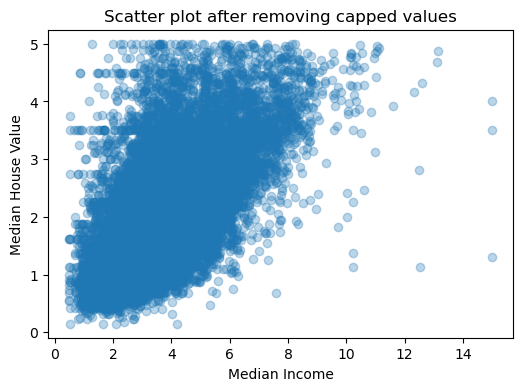

In [23]:

# Verify the changes
print(f"Shape of dataset after removal: {df.shape}")

# Optional: Re-plot the scatter plot to confirm the change
plt.figure(figsize=(6, 4))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Scatter plot after removing capped values")
plt.show()


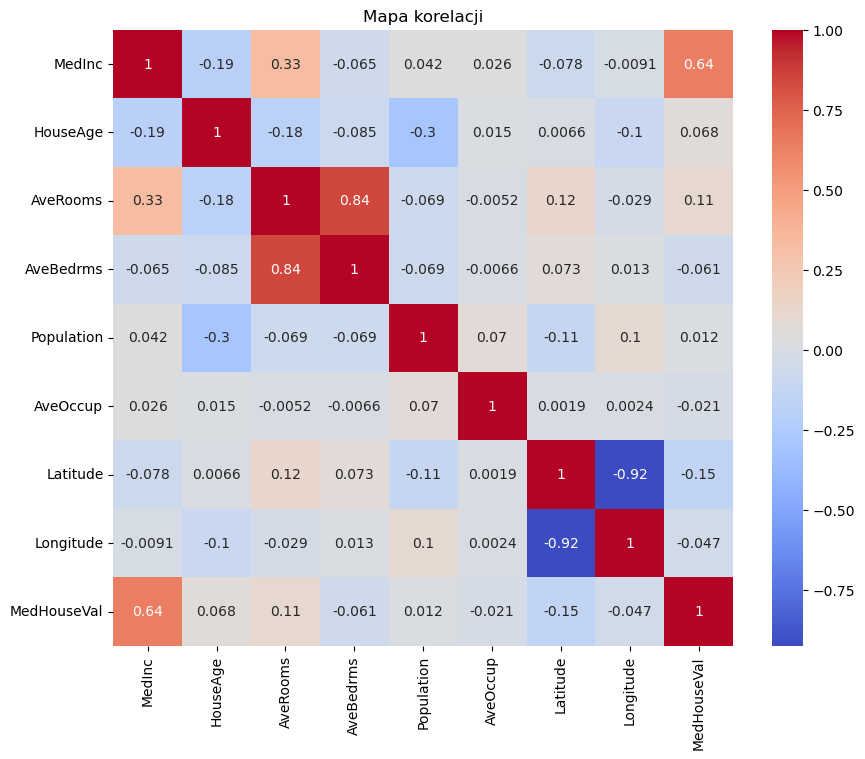

In [24]:

# Mapa korelacji
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa korelacji")
plt.show()

In [25]:
# -------------------------------------
# Przygotowanie danych do modelu
# -------------------------------------
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']


In [26]:
from sklearn.model_selection import train_test_split
# Podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

model_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [28]:
model_lr.fit(X_train, y_train)

,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [29]:
model_lr.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('regressor', LinearRegression())],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'regressor': LinearRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'regressor__copy_X': True,
 'regressor__fit_intercept': True,
 'regressor__n_jobs': None,
 'regressor__positive': False,
 'regressor__tol': 1e-06}

In [30]:
y_pred_lr = model_lr.predict(X_test)


In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr  = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [32]:
# Wyświetlenie wyników regresji liniowej
print("Wyniki regresji liniowej:")

# MSE – średni błąd kwadratowy (im mniejszy, tym lepiej; duże błędy są mocno karane)
print("MSE_lr:", mse_lr)

# RMSE – pierwiastek z MSE, łatwiejszy do interpretacji (średni błąd modelu w jednostkach ceny)
print("RMSE_lr:", rmse_lr)

# MAE – średni błąd absolutny (typowy błąd modelu; bardziej odporne na wartości odstające niż RMSE)
print("MAE_lr:", mae_lr)

# R² – współczynnik wyjaśniania wariancji (ile % zmienności cen domów model potrafi wyjaśnić)
print("R²_lr:", r2_lr)


Wyniki regresji liniowej:
MSE_lr: 0.4238967681845708
RMSE_lr: 0.6510735505183503
MAE_lr: 0.4898016513229423
R²_lr: 0.5748697510633902


In [33]:
y_train_pred_lr = model_lr.predict(X_train)
y_test_pred_lr  = model_lr.predict(X_test)

r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr  = r2_score(y_test, y_test_pred_lr)

print(r2_train_lr, r2_test_lr)


0.5687308648274065 0.5748697510633902


In [34]:
# -------------------------------------
# Regularyzacja - Ridge i Lasso
# -------------------------------------
alphas = [0.01, 0.1, 1, 10, 100]
mse_lr_ridge_list = []
r2_lr_ridge_list = []
mse_lr_lasso_list = []
r2_lr_lasso_list = []

In [35]:
from sklearn.linear_model import Ridge, Lasso

for alpha in alphas:
    # Ridge
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    y_pred_ridge = ridge_reg.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    mse_lr_ridge_list.append(mse_ridge)
    r2_lr_ridge_list.append(r2_ridge)
    
    # Lasso
    lasso_reg = Lasso(alpha=alpha, max_iter=10000)
    lasso_reg.fit(X_train, y_train)
    y_pred_lasso = lasso_reg.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    mse_lr_lasso_list.append(mse_lasso)
    r2_lr_lasso_list.append(r2_lasso)

In [36]:
ridge_reg.coef_

array([ 4.13788274e-01,  8.33531726e-03, -8.28998254e-02,  4.73127705e-01,
        5.96091902e-06, -3.10166822e-03, -3.77742631e-01, -3.91682610e-01])

In [37]:
results_df = pd.DataFrame({
    'alpha': alphas,
    'MSE_lr_Ridge': mse_lr_ridge_list,
    'R2_lr_Ridge': r2_lr_ridge_list,
    'MSE_lr_Lasso': mse_lr_lasso_list,
    'R2_lr_Lasso': r2_lr_lasso_list
})

print("Wyniki Ridge i Lasso dla różnych alpha:")
display(results_df)

Wyniki Ridge i Lasso dla różnych alpha:


,alpha,MSE_lr_Ridge,R2_lr_Ridge,MSE_lr_Lasso,R2_lr_Lasso
0,0.01,0.423897,0.574870,0.434209,0.564528
1,0.10,0.423898,0.574868,0.509639,0.488878
2,1.00,0.423913,0.574853,0.997269,-0.000171
3,10.00,0.424062,0.574704,0.997259,-0.000160
4,100.00,0.425605,0.573157,0.997304,-0.000206


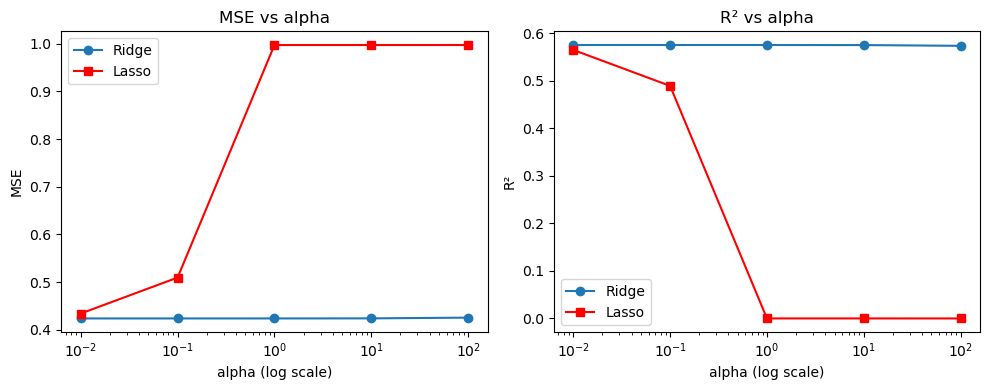

In [38]:

# Wykres MSE i R2 vs alpha
plt.figure(figsize=(10,4))

# MSE
plt.subplot(1,2,1)
plt.plot(alphas, mse_lr_ridge_list, marker='o', label='Ridge')
plt.plot(alphas, mse_lr_lasso_list, marker='s', label='Lasso', color='red')
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('MSE')
plt.title('MSE vs alpha')
plt.legend()

# R²
plt.subplot(1,2,2)
plt.plot(alphas, r2_lr_ridge_list, marker='o', label='Ridge')
plt.plot(alphas, r2_lr_lasso_list, marker='s', label='Lasso', color='red')
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('R²')
plt.title('R² vs alpha')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
[column for column in df.columns if df[column].dtype=='int64' or df[column].dtype=='float64' ]

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

In [40]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [41]:

# Podgląd współczynników Lasso dla różnych alpha
coefs_lasso = []
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha, max_iter=10000)
    lasso_reg.fit(X_train, y_train)
    coefs_lasso.append(lasso_reg.coef_)
coefs_lasso = np.array(coefs_lasso)

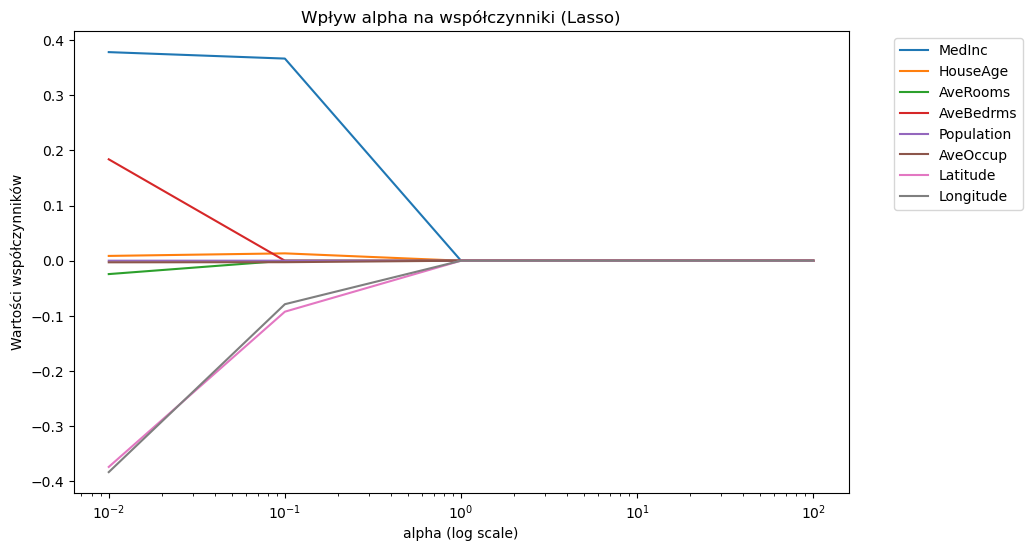

In [42]:

plt.figure(figsize=(10,6))
for i, col in enumerate(X.columns):
    plt.plot(alphas, coefs_lasso[:, i], label=col)
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('Wartości współczynników')
plt.title('Wpływ alpha na współczynniki (Lasso)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()   

In [43]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(
    max_depth=7,
    random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

In [44]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt  = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [45]:
# Wyświetlenie wyników regresji liniowej
print("Wyniki Decision Tree:")

# MSE – średni błąd kwadratowy (im mniejszy, tym lepiej; duże błędy są mocno karane)
print("MSE_dt:", mse_dt)

# RMSE – pierwiastek z MSE, łatwiejszy do interpretacji (średni błąd modelu w jednostkach ceny)
print("RMSE_dt:", rmse_dt)

# MAE – średni błąd absolutny (typowy błąd modelu; bardziej odporne na wartości odstające niż RMSE)
print("MAE_dt:", mae_dt)

# R² – współczynnik wyjaśniania wariancji (ile % zmienności cen domów model potrafi wyjaśnić)
print("R²_dt:", r2_dt)

Wyniki Decision Tree:
MSE_dt: 0.3838855493622458
RMSE_dt: 0.6195849815499451
MAE_dt: 0.44198947412083966
R²_dt: 0.6149973969783169


In [46]:
y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt  = model_dt.predict(X_test)

r2_train_dt = r2_score(y_train, y_train_pred_dt)
r2_test_dt  = r2_score(y_test, y_test_pred_dt)

print(r2_train_dt, r2_test_dt)


0.6770770602900941 0.6149973969783169


In [47]:
depths = [2, 3, 4, 5, 6, 7, 8, 10, None]  # None = drzewo bez ograniczeń
results = []

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    model.fit(X_train, y_train)

    r2_train = r2_score(y_train, model.predict(X_train))
    r2_test  = r2_score(y_test, model.predict(X_test))

    results.append((d, r2_train, r2_test))

results

[(2, 0.3874076909972456, 0.38174466179324185),
 (3, 0.4771685734506175, 0.4711246452852189),
 (4, 0.5279681731595758, 0.5040297640921774),
 (5, 0.5793903310337944, 0.5507972025484315),
 (6, 0.6278242275934329, 0.5776737374670462),
 (7, 0.6770770602900941, 0.6149973969783169),
 (8, 0.7332893654078947, 0.647919494106797),
 (10, 0.8198570724129927, 0.6517115285610176),
 (None, 1.0, 0.5535038661061455)]

In [48]:
from sklearn.ensemble import RandomForestRegressor

model_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(
        random_state=42,
        n_jobs=-1
    ))
])

In [49]:
model_rf.fit(X_train, y_train)

,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


In [50]:
pred_rf = model_rf.predict(X_test)

In [51]:
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf  = mean_absolute_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

In [52]:
# Wyświetlenie wyników lasów losowych
print("Wyniki Random Forest:")

# MSE – średni błąd kwadratowy (im mniejszy, tym lepiej; duże błędy są mocno karane)
print("MSE_rf:", mse_rf)

# RMSE – pierwiastek z MSE, łatwiejszy do interpretacji (średni błąd modelu w jednostkach ceny)
print("RMSE_rf:", rmse_rf)

# MAE – średni błąd absolutny (typowy błąd modelu; bardziej odporne na wartości odstające niż RMSE)
print("MAE_rf:", mae_rf)

# R² – współczynnik wyjaśniania wariancji (ile % zmienności cen domów model potrafi wyjaśnić)
print("R²_rf:", r2_rf)

Wyniki Random Forest:
MSE_rf: 0.22340222758889386
RMSE_rf: 0.47265444839638804
MAE_rf: 0.31466488866581954
R²_rf: 0.7759477029404809


In [53]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'regressor__n_estimators': [400, 500, 600],
    'regressor__max_depth': [12, 15, 18],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4, 8],
    'regressor__max_features': ['sqrt', 'log2']
}

In [54]:
model_rf_gs = RandomizedSearchCV(
    estimator=model_rf,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

In [55]:
model_rf_gs.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'regressor__max_depth': [12, 15, ...], 'regressor__max_features': ['sqrt', 'log2'], 'regressor__min_samples_leaf': [1, 2, ...], 'regressor__min_samples_split': [2, 5, ...], ...}"
,n_iter,20
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [56]:
best_model_rf_gs = model_rf_gs.best_params_
best_model_rf_gs

{'regressor__n_estimators': 600,
 'regressor__min_samples_split': 2,
 'regressor__min_samples_leaf': 1,
 'regressor__max_features': 'log2',
 'regressor__max_depth': 18}

In [57]:
y_pred_rf_gs = model_rf_gs.predict(X_test)

In [58]:
best_estimator = model_rf_gs.best_estimator_
best_estimator

,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,600
,criterion,'squared_error'
,max_depth,18
,min_samples_split,2


In [59]:
mse_rf_gs = mean_squared_error(y_test, y_pred_rf_gs)
rmse_rf_gs = np.sqrt(mse_rf_gs)
mae_rf_gs  = mean_absolute_error(y_test, y_pred_rf_gs)
r2_rf_gs = r2_score(y_test, y_pred_rf_gs)

In [60]:
# Wyświetlenie wyników lasów losowych po optymalizacji hiperparametrów
print("Wyniki Random Forest GS:")

# MSE – średni błąd kwadratowy (im mniejszy, tym lepiej; duże błędy są mocno karane)
print("MSE_rf:", mse_rf_gs)

# RMSE – pierwiastek z MSE, łatwiejszy do interpretacji (średni błąd modelu w jednostkach ceny)
print("RMSE_rf:", rmse_rf_gs)

# MAE – średni błąd absolutny (typowy błąd modelu; bardziej odporne na wartości odstające niż RMSE)
print("MAE_rf:", mae_rf_gs)

# R² – współczynnik wyjaśniania wariancji (ile % zmienności cen domów model potrafi wyjaśnić)
print("R²_rf:", r2_rf_gs)

Wyniki Random Forest GS:
MSE_rf: 0.21169221611761924
RMSE_rf: 0.460100223992142
MAE_rf: 0.31101283444121086
R²_rf: 0.7876917889196076


In [61]:
features = X_train.columns
features

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [62]:
importances =best_estimator.named_steps['regressor'].feature_importances_
importances

array([0.36047236, 0.05341659, 0.09243734, 0.04253087, 0.03494584,
       0.12403856, 0.14627138, 0.14588705])

In [63]:
for i, j in sorted(zip(features, importances), key=lambda x: x[1], reverse=True):
    print(i, j)

MedInc 0.36047236303364766
Latitude 0.14627138082172272
Longitude 0.14588705397769042
AveOccup 0.12403855804046322
AveRooms 0.09243733596013304
HouseAge 0.053416591196163536
AveBedrms 0.04253087492410161
Population 0.03494584204607786


In [64]:
if_ = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)


In [65]:
if_

,feature,importance
0,MedInc,0.360472
6,Latitude,0.146271
7,Longitude,0.145887
5,AveOccup,0.124039
2,AveRooms,0.092437
1,HouseAge,0.053417
3,AveBedrms,0.042531
4,Population,0.034946


In [66]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(
        n_estimators=500,
        max_depth=7,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
)

In [67]:
pipe_xgb = Pipeline(steps=[
    ("regressor", model_xgb)
])

In [68]:
pipe_xgb.fit(X_train, y_train)

,steps,"[('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None


In [69]:
y_pred_xgb = pipe_xgb.predict(X_test)

In [70]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb  = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [71]:
# Wyświetlenie wyników lasów losowych po optymalizacji hiperparametrów
print("Wyniki XGBoost:")

# MSE – średni błąd kwadratowy (im mniejszy, tym lepiej; duże błędy są mocno karane)
print("MSE_xgb:", mse_xgb)

# RMSE – pierwiastek z MSE, łatwiejszy do interpretacji (średni błąd modelu w jednostkach ceny)
print("RMSE_xgb:", rmse_xgb)

# MAE – średni błąd absolutny (typowy błąd modelu; bardziej odporne na wartości odstające niż RMSE)
print("MAE_xgb:", mae_xgb)

# R² – współczynnik wyjaśniania wariancji (ile % zmienności cen domów model potrafi wyjaśnić)
print("R²_xgb:", r2_xgb)

Wyniki XGBoost:
MSE_xgb: 0.17670578738230916
RMSE_xgb: 0.4203638749729919
MAE_xgb: 0.27638663270307345
R²_xgb: 0.822780023305884


In [72]:
# Słownik z parametrami, które RandomizedSearchCV ma losować i testować
param_grid = {
    # max_depth – maksymalna głębokość drzew w XGBoost (im większa, tym bardziej skomplikowane drzewa)
    # "regressor__" = odwołanie do kroku "regressor" w Pipeline (czyli naszego XGBRegressora)
    "regressor__max_depth": [3, 4, 5],

    # learning_rate – jak duży krok robi każde kolejne drzewo w boostingu
    # mniejsze wartości = wolniejsze, ale zwykle bezpieczniejsze uczenie (mniejsze ryzyko przeuczenia)
    "regressor__learning_rate": [0.02, 0.03, 0.05],

    # n_estimators – ile drzew zbuduje XGBoost (więcej drzew = mocniejszy model, ale wolniejszy)
    "regressor__n_estimators": [200, 400, 600],

    # subsample – jaki procent PRÓBEK (wierszy) używać do trenowania każdego drzewa
    # np. 0.8 = każde drzewo trenuje się na losowych 80% danych, co pomaga zmniejszyć przeuczenie
    "regressor__subsample": [0.6, 0.8],

    # colsample_bytree – jaki procent CECH (kolumn) używać przy budowie każdego drzewa
    # np. 0.8 = każde drzewo widzi tylko 80% losowo wybranych cech
    "regressor__colsample_bytree": [0.6, 0.8],

    # gamma – minimalny „zysk” z nowego podziału w drzewie, żeby ten podział został wykonany
    # większe gamma = mniej podziałów, prostsze drzewa (mocniejsza regularyzacja)
    "regressor__gamma": [0, 1, 5],
    # regularyzacja L2
    "regressor__reg_lambda": [0.1, 1, 5, 10],
    # regularyzacja L1
    "regressor__reg_alpha":  [2, 3, 5]
}


In [73]:
model_xgb_rs = RandomizedSearchCV(
    estimator=pipe_xgb,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [74]:
model_xgb_rs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'regressor__colsample_bytree': [0.6, 0.8], 'regressor__gamma': [0, 1, ...], 'regressor__learning_rate': [0.02, 0.03, ...], 'regressor__max_depth': [3, 4, ...], ...}"
,n_iter,20
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [75]:
best_params_xgb_rs = model_xgb_rs.best_params_
best_params_xgb_rs

{'regressor__subsample': 0.8,
 'regressor__reg_lambda': 1,
 'regressor__reg_alpha': 2,
 'regressor__n_estimators': 200,
 'regressor__max_depth': 5,
 'regressor__learning_rate': 0.05,
 'regressor__gamma': 1,
 'regressor__colsample_bytree': 0.8}

In [76]:
best_estimator_xgb_rs = model_xgb_rs.best_estimator_
best_estimator_xgb_rs

,steps,"[('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8


In [77]:
y_pred_xgb_rs = best_estimator_xgb_rs.predict(X_test)


In [78]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb_rs)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb  = mean_absolute_error(y_test, y_pred_xgb_rs)
r2_xgb = r2_score(y_test, y_pred_xgb_rs)

In [79]:
# Wyświetlenie wyników XGBoost po optymalizacji hiperparametrów
print("Wyniki XGBoost po Randomized Search:")

# MSE – średni błąd kwadratowy (im mniejszy, tym lepiej; duże błędy są mocno karane)
print("MSE_xgb:", mse_xgb)

# RMSE – pierwiastek z MSE, łatwiejszy do interpretacji (średni błąd modelu w jednostkach ceny)
print("RMSE_xgb:", rmse_xgb)

# MAE – średni błąd absolutny (typowy błąd modelu; bardziej odporne na wartości odstające niż RMSE)
print("MAE_xgb:", mae_xgb)

# R² – współczynnik wyjaśniania wariancji (ile % zmienności cen domów model potrafi wyjaśnić)
print("R²_xgb:", r2_xgb)

Wyniki XGBoost po Randomized Search:
MSE_xgb: 0.2072172952268787
RMSE_xgb: 0.4552112643892709
MAE_xgb: 0.3153303961830842
R²_xgb: 0.7921797312089525


In [80]:
# RMSE i R2 dla TRAIN
y_pred_train = model_xgb_rs.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train   = r2_score(y_train, y_pred_train)

print("RMSE TRAIN : ",rmse_train)
print("R2 TRAIN : ",r2_train)

RMSE TRAIN :  0.4038701558616867
R2 TRAIN :  0.8272248850419601


In [81]:
y_pred_test = model_xgb_rs.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test   = r2_score(y_test, y_pred_test)

print("RMSE TEST : ",rmse_test)
print("R2 TEST : ",r2_test)


RMSE TEST :  0.4552112643892709
R2 TEST :  0.7921797312089525


In [82]:
importances_xgb_rs = best_estimator_xgb_rs.named_steps['regressor'].feature_importances_
importances_xgb_rs

array([0.5070072 , 0.05975435, 0.08898186, 0.03644225, 0.01644762,
       0.12868683, 0.0760703 , 0.08660959], dtype=float32)

In [83]:
if_xgb = pd.DataFrame({
    'feature': features,
    'importance': importances_xgb_rs
}).sort_values(by='importance', ascending=False)

In [84]:
if_xgb

,feature,importance
0,MedInc,0.507007
5,AveOccup,0.128687
2,AveRooms,0.088982
7,Longitude,0.086610
6,Latitude,0.076070
1,HouseAge,0.059754
3,AveBedrms,0.036442
4,Population,0.016448


In [85]:
import shap

In [86]:
shap.initjs()

In [87]:
# Twój finalny pipeline po RandomizedSearchCV
# (wcześniej miałeś: best_estimator_xgb_rs = model_xgb_rs.best_estimator_)
regressor_xgb = best_estimator_xgb_rs.named_steps['regressor']
regressor_xgb

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [133]:
explainer = shap.TreeExplainer(regressor_xgb)

# SHAP values dla zbioru testowego
shap_values = explainer.shap_values(X_test)

shap_values.shape

(3935, 8)

In [89]:
feature_names = X.columns.tolist()
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

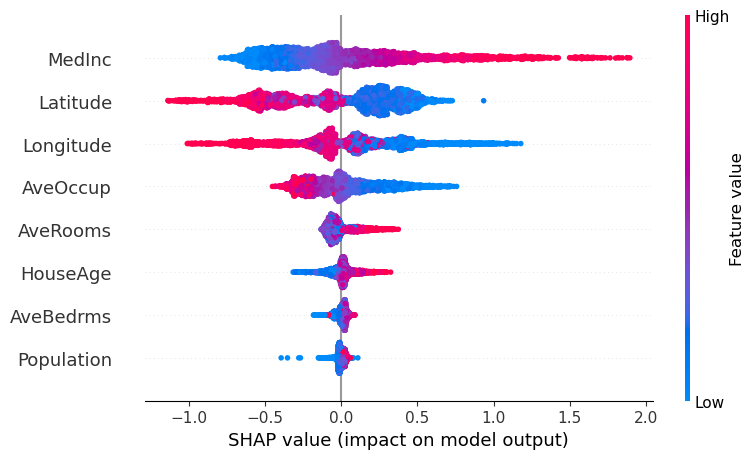

In [90]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

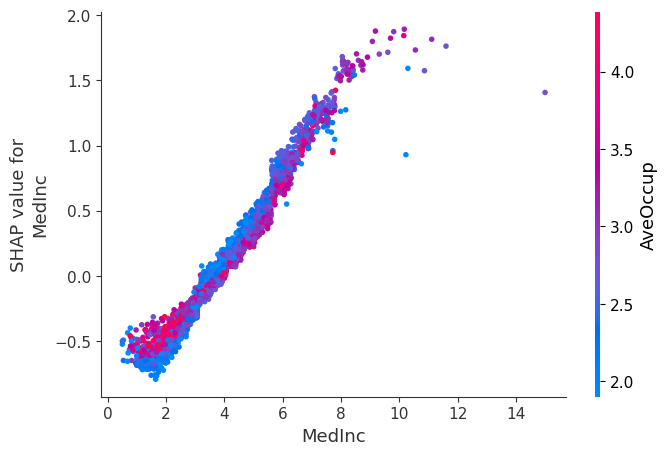

In [91]:
shap.dependence_plot("MedInc", shap_values, X_test, feature_names=feature_names)

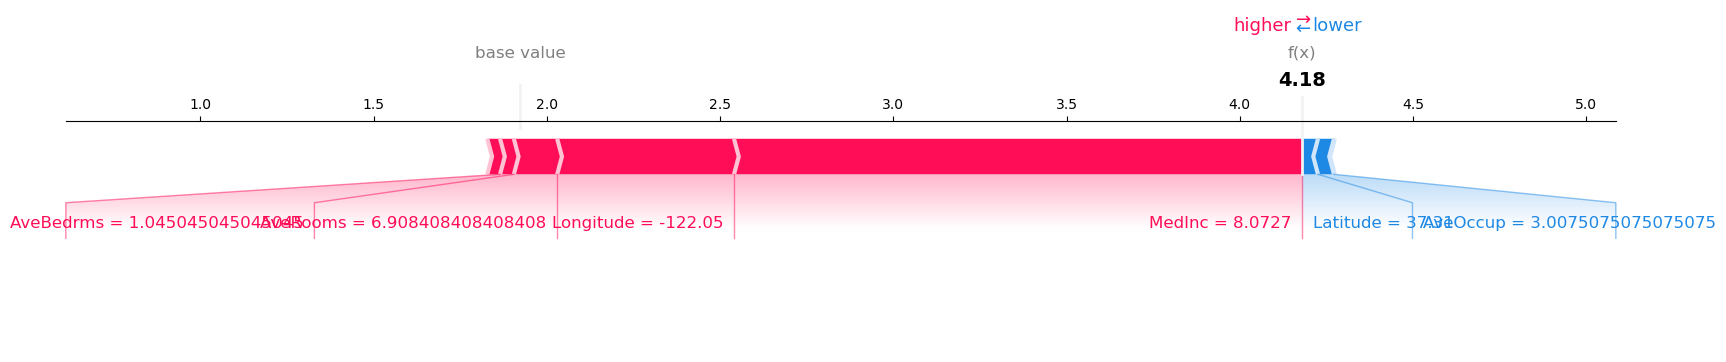

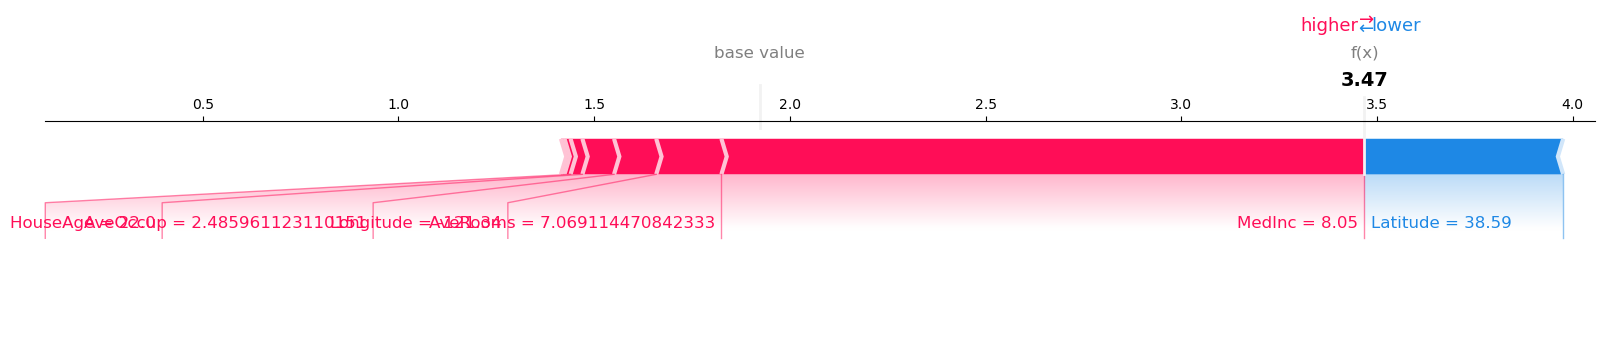

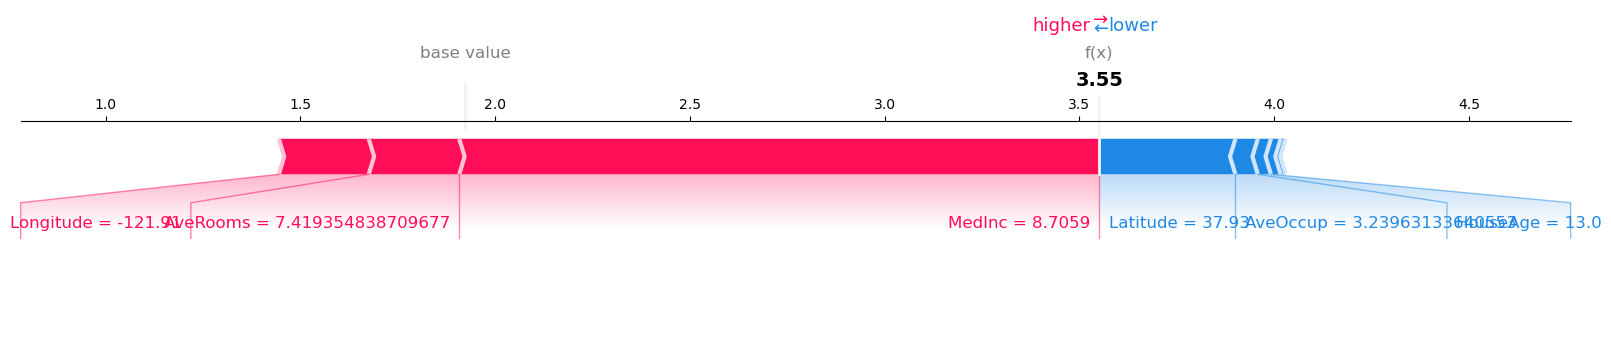

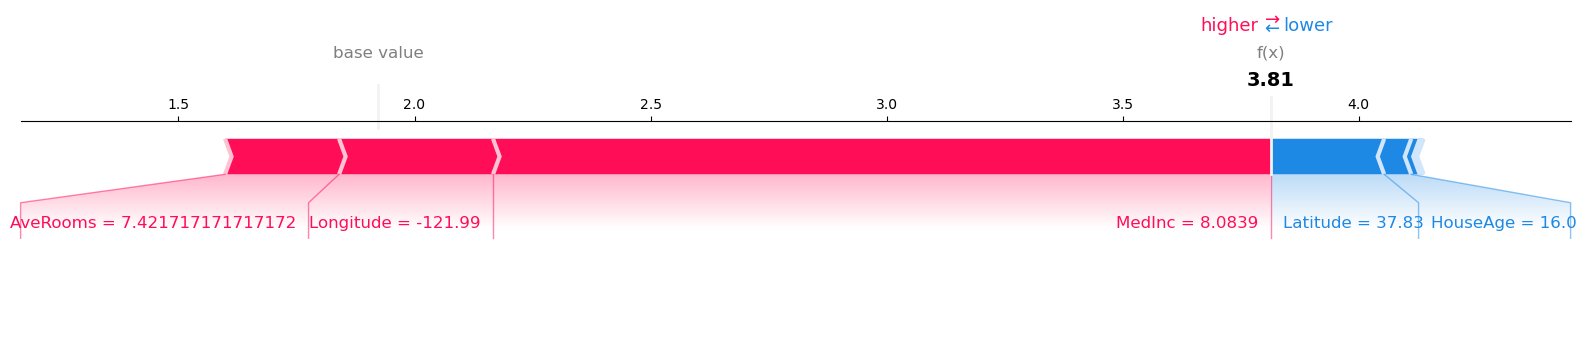

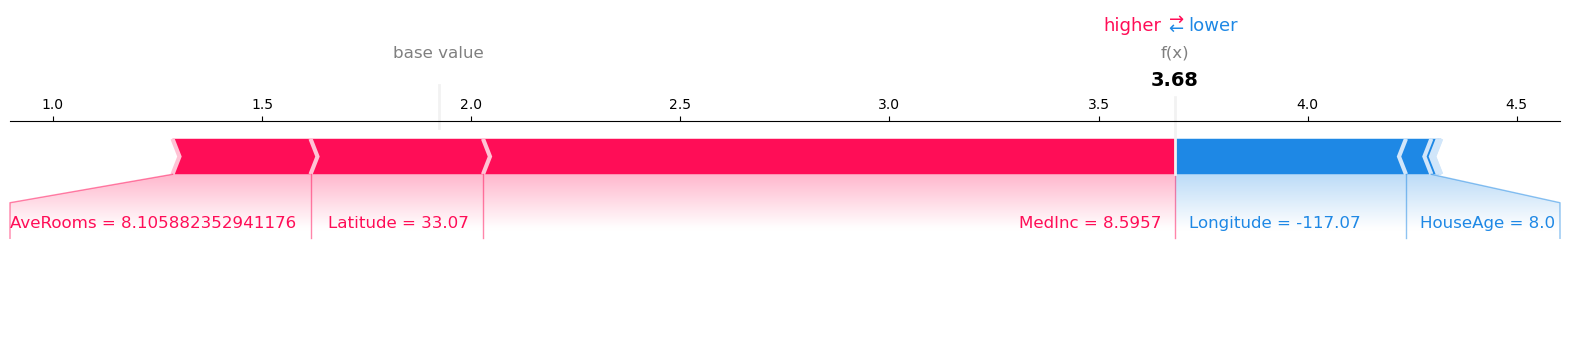

In [92]:
ind_pos = [3177, 3213,  599, 3049,  763]  # możesz zmieniać np. na 10, 100, 123...

for i in ind_pos:
    shap.force_plot(
        explainer.expected_value,
        shap_values[i, :],
        X_test.iloc[i, :],
        feature_names=feature_names,
        matplotlib=True
    )
    plt.show()

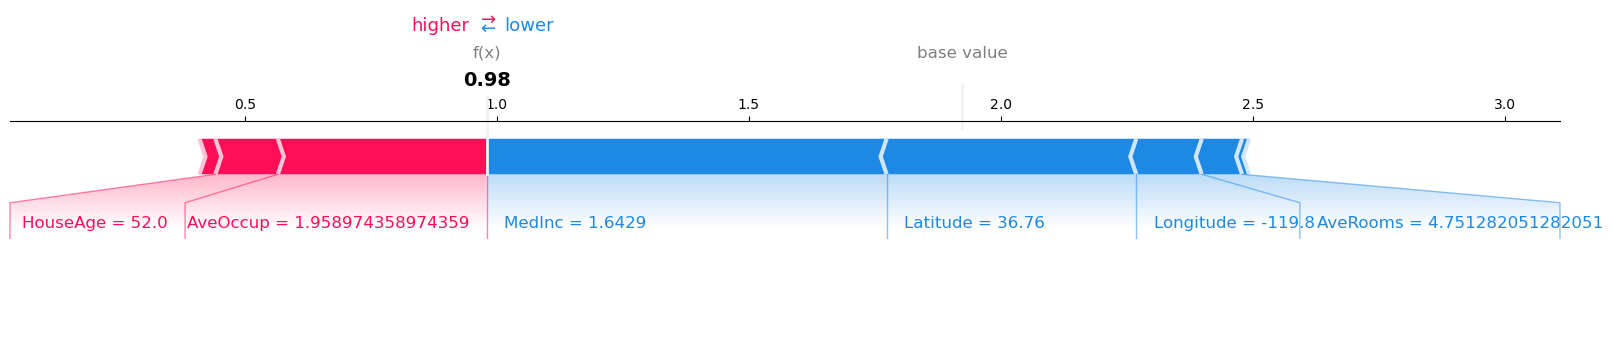

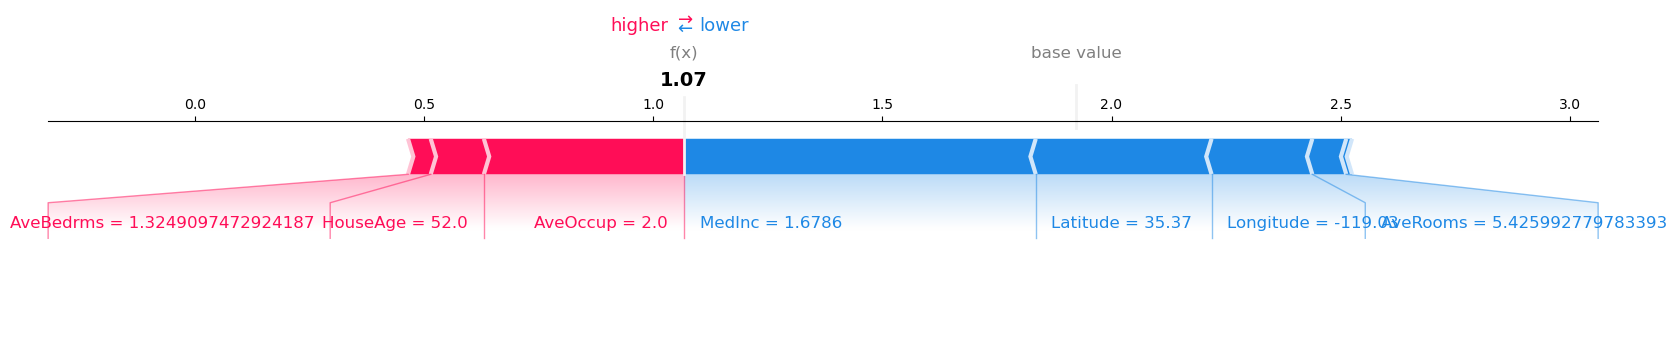

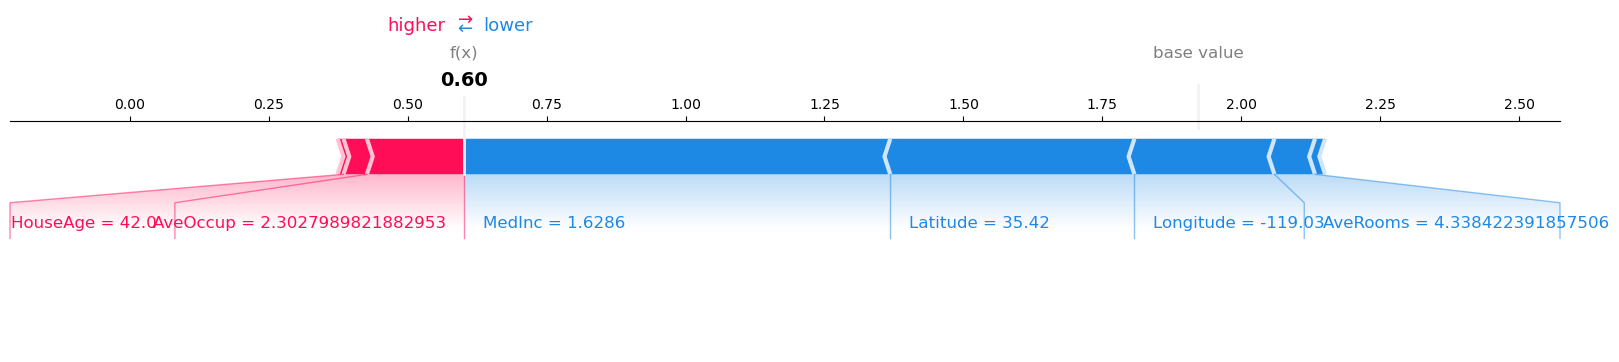

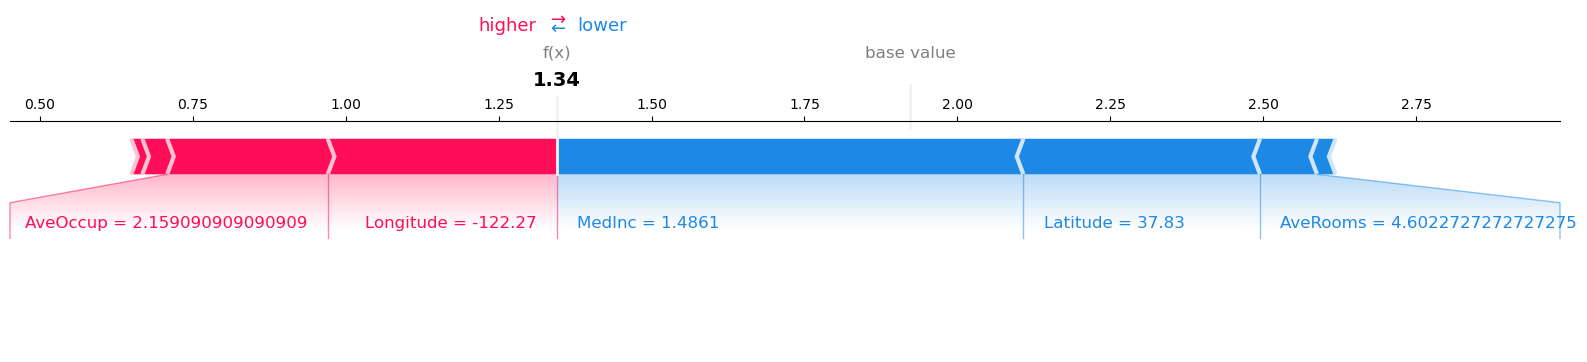

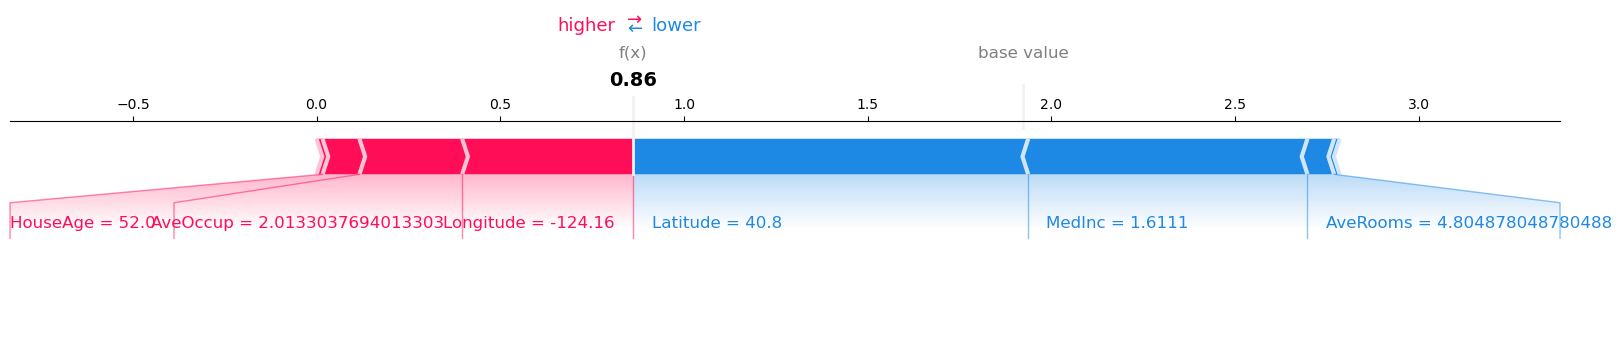

In [93]:
ind_neg = [3216, 1527, 1894, 1117,  242]  # możesz zmieniać np. na 10, 100, 123...

for i in ind_neg:
    shap.force_plot(
        explainer.expected_value,
        shap_values[i, :],
        X_test.iloc[i, :],
        feature_names=feature_names,
        matplotlib=True
    )
    plt.show()

In [94]:
# SHAP dla MedInc (kolumna indeks 0)
shap_medinc = shap_values[:, 0]

# progi dla górnego i dolnego 1%
low_q  = np.quantile(shap_medinc, 0.01)
high_q = np.quantile(shap_medinc, 0.99)

outliers = np.where((shap_medinc < low_q) | (shap_medinc > high_q))[0]
outliers[:20]  # pokaz pierwsze 20 indeksów

array([ 28,  57, 241, 242, 245, 247, 391, 438, 509, 538, 599, 648, 669,
       686, 744, 760, 763, 778, 808, 838])

In [95]:
X_test.iloc[outliers].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17363,1.7431,52.0,5.039855,1.039855,632.0,2.289855,34.95,-120.42
15542,8.6803,16.0,6.580822,0.920548,1080.0,2.958904,33.07,-117.10
12734,7.8031,18.0,7.153509,1.000000,599.0,2.627193,38.58,-121.34
2562,1.6111,52.0,4.804878,1.064302,908.0,2.013304,40.80,-124.16
1599,8.0448,35.0,7.672176,0.997245,1001.0,2.757576,37.88,-122.12


In [96]:
# największe dodatnie wpływy MedInc
top_pos = np.argsort(shap_medinc)[-20:]

# największe ujemne wpływy (najbardziej w dół)
top_neg = np.argsort(shap_medinc)[:20]

top_pos, top_neg

(array([3177, 3213,  599, 3049,  763, 2778, 3553,  245,  247, 2133, 1711,
         391, 3362, 3149, 3485, 1299, 2476,  509, 2090, 2632]),
 array([3216, 1527, 1894, 1117,  242, 2621,   28, 2461, 3529, 1730, 2765,
        2229, 3252, 1626, 2930, 1199,  838,  744, 2498, 1814]))

In [97]:
# Predykcje na zbiorze testowym
y_pred = best_estimator_xgb_rs.predict(X_test)

# Błąd absolutny dla każdej próbki
errors = np.abs(y_test - y_pred)

errors[:10]  # podgląd

15065    0.228296
14534    0.025904
13570    0.906911
2607     0.200321
12750    0.022198
5192     0.263151
2147     0.098883
19839    0.061974
16692    0.127101
14748    0.396231
Name: MedHouseVal, dtype: float64

In [98]:
# Indeks największego błędu
idx_max_error = np.argmax(errors)
idx_max_error

np.int64(3339)

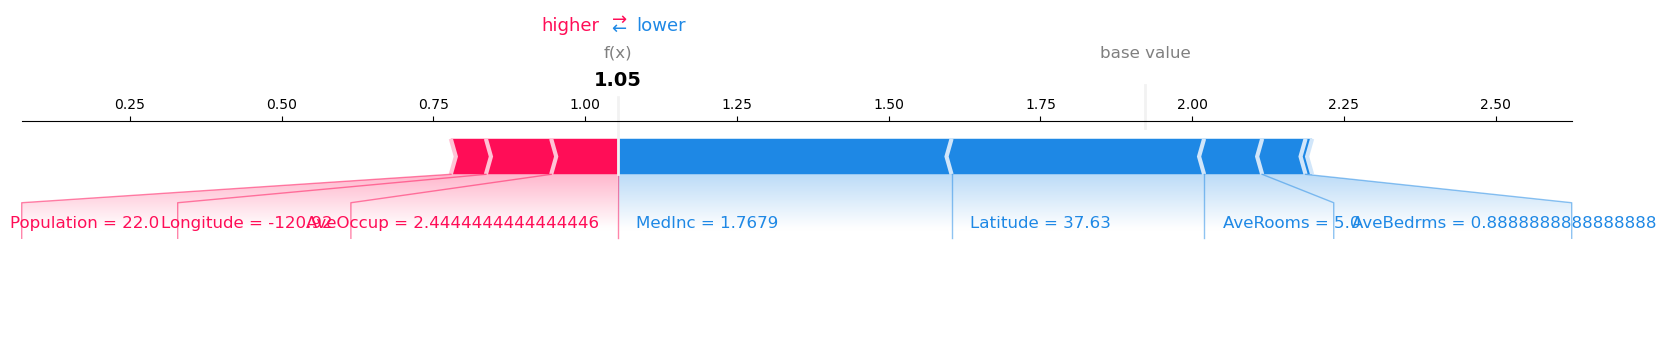

In [99]:
i = 3339  # możesz zmieniać np. na 10, 100, 123...

shap.force_plot(
    explainer.expected_value,
    shap_values[i, :],
    X_test.iloc[i, :],
    feature_names=feature_names,
    matplotlib=True
)

In [100]:
from catboost import CatBoostRegressor

In [101]:
# === CatBoost - baseline model ===

cat_model = CatBoostRegressor(
    loss_function='RMSE',   # uczymy się na RMSE (pasuje do Twoich metryk)
    depth=6,                # głębokość drzew (symetrycznych), sensowny punkt wyjścia
    learning_rate=0.1,      # standardowy LR jak w XGBoost baseline
    n_estimators=500,       # liczba drzew (iterations); później możemy tunować
    random_seed=42,         # powtarzalność wyników
    verbose=False           # wyłączamy spam w output (na razie)
)

In [102]:
# Trening na zbiorze treningowym
cat_model.fit(X_train, y_train)

In [103]:
# 1) Predykcje na train i test
y_pred_train_cat = cat_model.predict(X_train)
y_pred_test_cat  = cat_model.predict(X_test)

# 2) RMSE i R2 - TRAIN
rmse_train_cat = np.sqrt(mean_squared_error(y_train, y_pred_train_cat))
r2_train_cat   = r2_score(y_train, y_pred_train_cat)

# 3) RMSE i R2 - TEST
rmse_test_cat = np.sqrt(mean_squared_error(y_test, y_pred_test_cat))
r2_test_cat   = r2_score(y_test, y_pred_test_cat)

print("=== CatBoost baseline ===")
print("RMSE TRAIN :", rmse_train_cat)
print("R2   TRAIN :", r2_train_cat)
print()
print("RMSE TEST  :", rmse_test_cat)
print("R2   TEST  :", r2_test_cat)


=== CatBoost baseline ===
RMSE TRAIN : 0.33192788401988893
R2   TRAIN : 0.8832961612963774

RMSE TEST  : 0.4222781515374491
R2   TEST  : 0.8211622796710633


In [104]:
# === Prosta diagnoza overfittingu dla CatBoosta ===

# 1) policz różnice między train i test
rmse_diff = rmse_test_cat - rmse_train_cat    # im mniejsza, tym lepiej
r2_diff   = r2_train_cat - r2_test_cat        # im mniejsza, tym lepiej

print("=== CatBoost – analiza overfittingu ===")
print(f"RMSE TRAIN : {rmse_train_cat:.4f}")
print(f"RMSE TEST  : {rmse_test_cat:.4f}")
print(f"RÓŻNICA RMSE (TEST - TRAIN): {rmse_diff:.4f}")
print()
print(f"R2 TRAIN   : {r2_train_cat:.4f}")
print(f"R2 TEST    : {r2_test_cat:.4f}")
print(f"RÓŻNICA R2 (TRAIN - TEST)  : {r2_diff:.4f}")
print("\nWerdykt:")

# 2) progi "na czuja" – możesz potem dostosować pod swoje projekty
#  - bardzo małe różnice -> brak overfittingu
#  - średnie różnice     -> lekki overfitting (zwykle OK)
#  - duże różnice        -> mocny overfitting

if rmse_diff < 0:
    print("⚠️ Coś nietypowego: RMSE na teście jest mniejsze niż na treningu (może losowość, za mało danych).")
elif rmse_diff < 0.05 and r2_diff < 0.03:
    print("✅ Różnice bardzo małe – model NIE jest przeuczony, świetna generalizacja.")
elif rmse_diff < 0.10 and r2_diff < 0.07:
    print("ℹ️ Lekki overfitting, ale w pełni akceptowalny. Model zachowuje się zdrowo.")
else:
    print("❌ Mocny overfitting – model za dobrze uczy się treningu, gorsza generalizacja na test.")


=== CatBoost – analiza overfittingu ===
RMSE TRAIN : 0.3319
RMSE TEST  : 0.4223
RÓŻNICA RMSE (TEST - TRAIN): 0.0904

R2 TRAIN   : 0.8833
R2 TEST    : 0.8212
RÓŻNICA R2 (TRAIN - TEST)  : 0.0621

Werdykt:
ℹ️ Lekki overfitting, ale w pełni akceptowalny. Model zachowuje się zdrowo.


In [105]:
base_cat = CatBoostRegressor(
    loss_function='RMSE',
    random_seed=42,
    verbose=False
)

param_distributions = {
    "depth": [4, 5, 6, 7, 8],
    "learning_rate": [0.03, 0.05, 0.07, 0.1],
    "iterations": [300, 500, 800, 1000],
    "l2_leaf_reg": [1, 3, 5, 7, 10],
    "bagging_temperature": [0, 0.5, 1, 2]
}

cat_rs = RandomizedSearchCV(
    estimator=base_cat,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    random_state=42
)

cat_rs.fit(X_train, y_train)
best_cat = cat_rs.best_estimator_

In [108]:
cat_rs.best_params_

{'learning_rate': 0.1,
 'l2_leaf_reg': 1,
 'iterations': 1000,
 'depth': 7,
 'bagging_temperature': 1}

In [113]:
# === Finalny model CatBoost z best params + early stopping ===

cat_final = CatBoostRegressor(
    loss_function='RMSE',
    learning_rate=0.05,     # z RandomizedSearch
    l2_leaf_reg=5,         # z RandomizedSearch (delikatna regularyzacja)
    iterations=1000,       # górny limit drzew
    depth=6,               # z RandomizedSearch
    bagging_temperature=1, # z RandomizedSearch
    random_seed=42,
    verbose=False
)

cat_final.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),  # pilnujemy jakości na teście
    early_stopping_rounds=50,   # jeśli 50 iteracji bez poprawy -> stop
    use_best_model=True         # zapisz najlepszą iterację, nie ostatnią
)

In [114]:
# === Metryki dla finalnego modelu CatBoost ===

y_pred_train_final = cat_final.predict(X_train)
y_pred_test_final  = cat_final.predict(X_test)

rmse_train_final = np.sqrt(mean_squared_error(y_train, y_pred_train_final))
r2_train_final   = r2_score(y_train, y_pred_train_final)

rmse_test_final = np.sqrt(mean_squared_error(y_test, y_pred_test_final))
r2_test_final   = r2_score(y_test, y_pred_test_final)

print("=== CatBoost FINAL (best params + early stopping) ===")
print(f"RMSE TRAIN : {rmse_train_final:.4f}")
print(f"R2   TRAIN : {r2_train_final:.4f}")
print()
print(f"RMSE TEST  : {rmse_test_final:.4f}")
print(f"R2   TEST  : {r2_test_final:.4f}")

=== CatBoost FINAL (best params + early stopping) ===
RMSE TRAIN : 0.3381
R2   TRAIN : 0.8789

RMSE TEST  : 0.4222
R2   TEST  : 0.8212


In [115]:
# === Diagnoza overfittingu dla finalnego CatBoosta ===

rmse_diff_final = rmse_test_final - rmse_train_final
r2_diff_final   = r2_train_final - r2_test_final

print("=== CatBoost FINAL – analiza overfittingu ===")
print(f"RMSE TRAIN : {rmse_train_final:.4f}")
print(f"RMSE TEST  : {rmse_test_final:.4f}")
print(f"RÓŻNICA RMSE (TEST - TRAIN): {rmse_diff_final:.4f}")
print()
print(f"R2 TRAIN   : {r2_train_final:.4f}")
print(f"R2 TEST    : {r2_test_final:.4f}")
print(f"RÓŻNICA R2 (TRAIN - TEST)  : {r2_diff_final:.4f}")
print("\nWerdykt:")

if rmse_diff_final < 0:
    print("⚠️ RMSE na teście mniejsze niż na treningu – możliwy wpływ losowości / mało danych.")
elif rmse_diff_final < 0.05 and r2_diff_final < 0.03:
    print("✅ Różnice bardzo małe – model NIE jest przeuczony, świetna generalizacja.")
elif rmse_diff_final < 0.10 and r2_diff_final < 0.07:
    print("ℹ️ Lekki overfitting, ale w pełni akceptowalny. Model zachowuje się zdrowo.")
else:
    print("❌ Mocny overfitting – model za bardzo dopasowany do treningu, gorsza generalizacja.")

=== CatBoost FINAL – analiza overfittingu ===
RMSE TRAIN : 0.3381
RMSE TEST  : 0.4222
RÓŻNICA RMSE (TEST - TRAIN): 0.0841

R2 TRAIN   : 0.8789
R2 TEST    : 0.8212
RÓŻNICA R2 (TRAIN - TEST)  : 0.0577

Werdykt:
ℹ️ Lekki overfitting, ale w pełni akceptowalny. Model zachowuje się zdrowo.


In [126]:
# Najlepszy model z RandomizedSearchCV
best_cat = cat_rs.best_estimator_

# Wagi cech z CatBoosta
importances_cb = best_cat.feature_importances_

# Tabelka z nazwami cech
fi_cb = (
    pd.DataFrame({
        "feature": X.columns,
        "importance": importances_cb
    })
    .sort_values(by="importance", ascending=False)
    .reset_index(drop=True)
)

fi_cb

,feature,importance
0,MedInc,25.494912
1,Latitude,23.936561
2,Longitude,21.406244
3,AveOccup,12.058616
4,HouseAge,5.845467
5,AveRooms,5.337969
6,Population,3.022867
7,AveBedrms,2.897366


In [117]:
# Inicjalizacja SHAP (do interaktywnych wykresów w Jupyterze)
shap.initjs()


In [118]:
# Tworzymy explainer dla finalnego modelu CatBoost
explainer_cat = shap.TreeExplainer(cat_final)

# Liczymy wartości SHAP dla zbioru testowego
# (każdy wiersz = obserwacja, każda kolumna = cecha)
shap_values_cat = explainer_cat.shap_values(X_test)

shap_values_cat.shape

(3935, 8)

In [119]:
feature_names = X.columns.tolist()
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [127]:
# globalna ważność SHAP – średnia bezwzględna wartość
shap_importance_cat = np.abs(shap_values_cat).mean(axis=0)

fi_shap_cat = (
    pd.DataFrame({
        "feature": feature_names,
        "shap_importance": shap_importance_cat
    })
    .sort_values(by="shap_importance", ascending=False)
    .reset_index(drop=True)
)

fi_shap_cat

,feature,shap_importance
0,Latitude,0.528583
1,Longitude,0.442398
2,MedInc,0.310035
3,AveOccup,0.171373
4,AveRooms,0.102806
5,HouseAge,0.042910
6,AveBedrms,0.021133
7,Population,0.020666


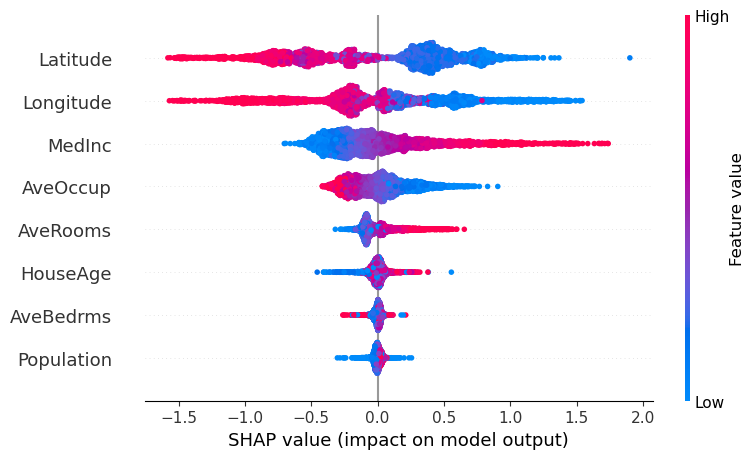

In [120]:
# SHAP summary plot – globalny wpływ cech dla CatBoosta
shap.summary_plot(
    shap_values_cat,
    X_test,
    feature_names=feature_names
)

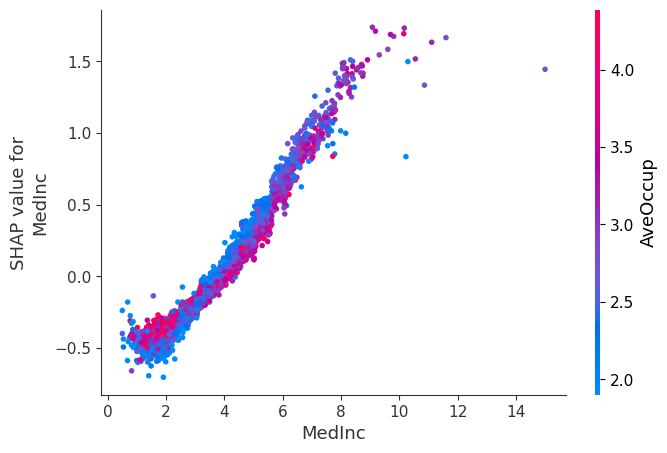

In [121]:
# Zależność SHAP od MedInc w CatBooscie
shap.dependence_plot(
    "MedInc",
    shap_values_cat,
    X_test,
    feature_names=feature_names
)

In [135]:
shap.initjs()

# --- XGBoost ---
explainer_xgb = shap.TreeExplainer(regressor_xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test)

# --- CatBoost (finalny, z regularyzacją) ---
explainer_cb = shap.TreeExplainer(cat_final)
shap_values_cb = explainer_cb.shap_values(X_test)

shap_values_xgb.shape, shap_values_cb.shape


((3935, 8), (3935, 8))

In [136]:
feature_names = X.columns.tolist()  # na wszelki wypadek

# --- XGBoost: globalne znaczenie cech wg SHAP (średnia wartość bezwzględna) ---
shap_importance_xgb = np.abs(shap_values_xgb).mean(axis=0)

fi_shap_xgb = (
    pd.DataFrame({
        "feature": feature_names,
        "shap_xgb": shap_importance_xgb
    })
    .sort_values(by="shap_xgb", ascending=False)
    .reset_index(drop=True)
)

print("XGBoost – SHAP importance:")
display(fi_shap_xgb)

# --- CatBoost: globalne znaczenie cech wg SHAP ---
shap_importance_cb = np.abs(shap_values_cb).mean(axis=0)

fi_shap_cb = (
    pd.DataFrame({
        "feature": feature_names,
        "shap_cb": shap_importance_cb
    })
    .sort_values(by="shap_cb", ascending=False)
    .reset_index(drop=True)
)

print("CatBoost – SHAP importance:")
display(fi_shap_cb)

XGBoost – SHAP importance:


,feature,shap_xgb
0,MedInc,0.378383
1,Latitude,0.348658
2,Longitude,0.293390
3,AveOccup,0.184273
4,AveRooms,0.070424
5,HouseAge,0.053012
6,AveBedrms,0.025115
7,Population,0.017266


CatBoost – SHAP importance:


,feature,shap_cb
0,Latitude,0.528583
1,Longitude,0.442398
2,MedInc,0.310035
3,AveOccup,0.171373
4,AveRooms,0.102806
5,HouseAge,0.042910
6,AveBedrms,0.021133
7,Population,0.020666


In [137]:
# --- scalanie po nazwie cechy ---
fi_compare = fi_shap_xgb.merge(fi_shap_cb, on="feature", how="inner")

# różnica w SHAP (CatBoost - XGBoost)
fi_compare["difference"] = fi_compare["shap_cb"] - fi_compare["shap_xgb"]

# rankingi (1 = najważniejsza cecha wg danego modelu)
fi_compare["rank_xgb"] = fi_compare["shap_xgb"].rank(ascending=False).astype(int)
fi_compare["rank_cb"]  = fi_compare["shap_cb"].rank(ascending=False).astype(int)

# sortowanie po ważności XGBoosta (możesz zmienić na 'rank_cb', jeśli wolisz)
fi_compare = fi_compare.sort_values("rank_xgb").reset_index(drop=True)

fi_compare

,feature,shap_xgb,shap_cb,difference,rank_xgb,rank_cb
0,MedInc,0.378383,0.310035,-0.068348,1,3
1,Latitude,0.348658,0.528583,0.179925,2,1
2,Longitude,0.293390,0.442398,0.149008,3,2
3,AveOccup,0.184273,0.171373,-0.012900,4,4
4,AveRooms,0.070424,0.102806,0.032383,5,5
5,HouseAge,0.053012,0.042910,-0.010103,6,6
6,AveBedrms,0.025115,0.021133,-0.003981,7,7
7,Population,0.017266,0.020666,0.003400,8,8
